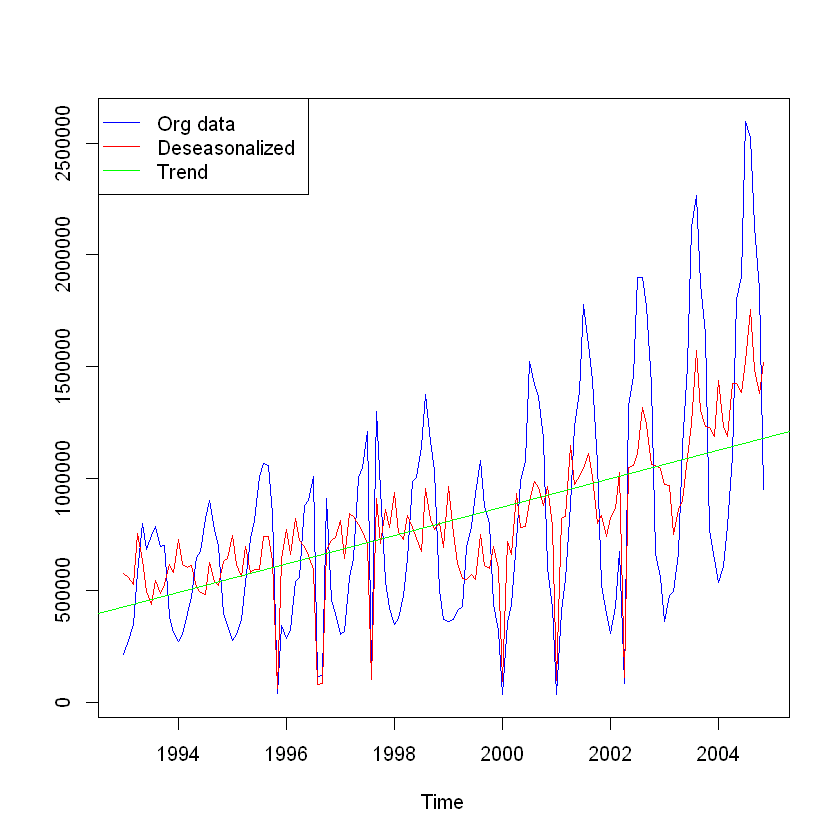

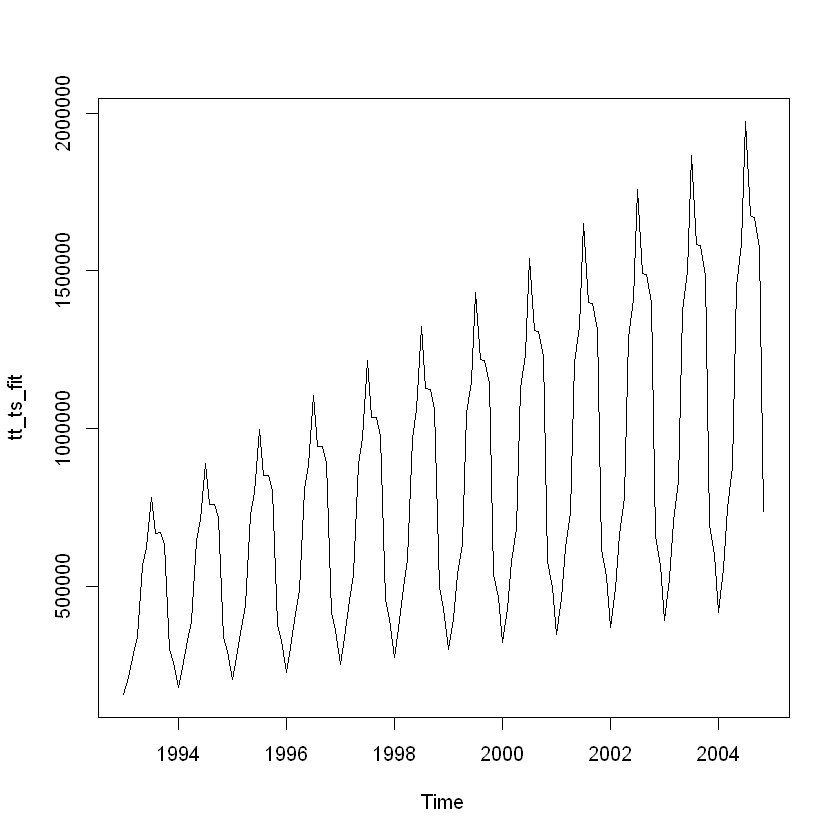

[1] 0.07816013

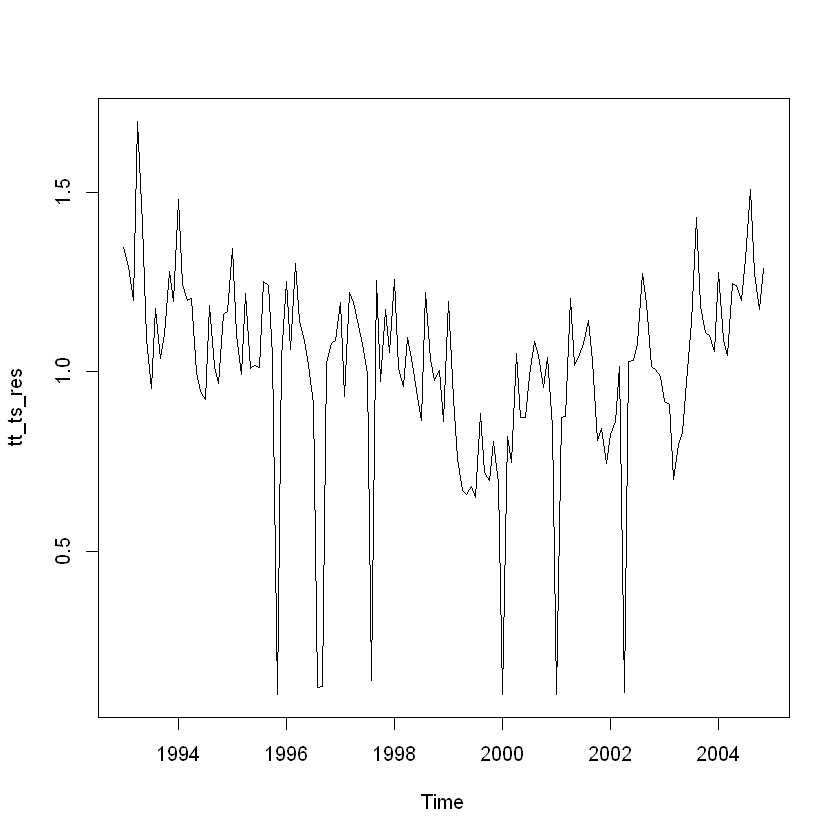

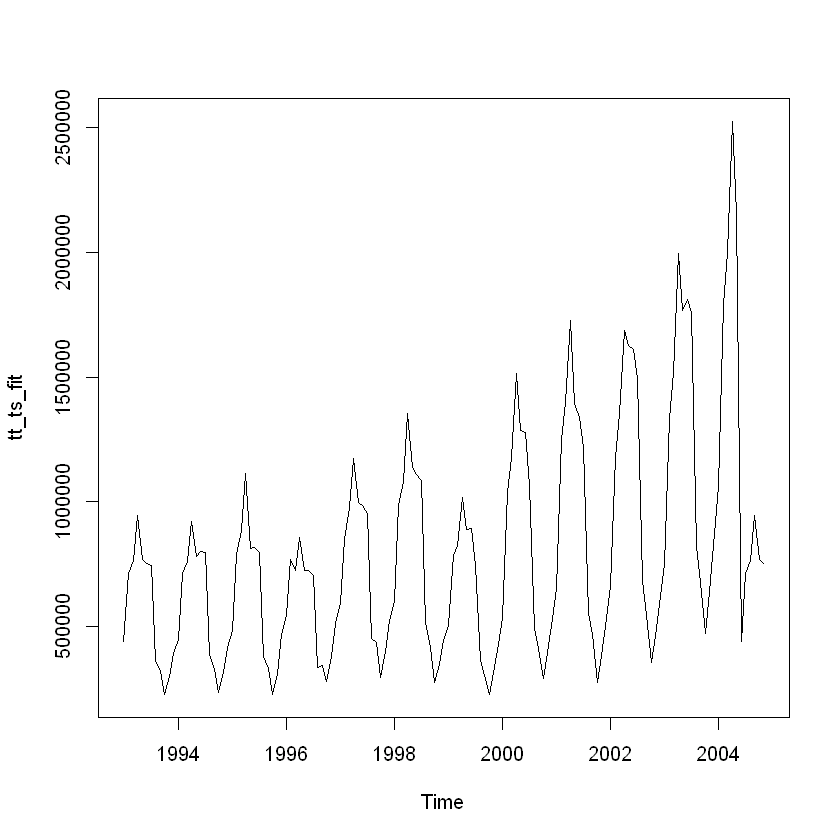

[1] 0.104986

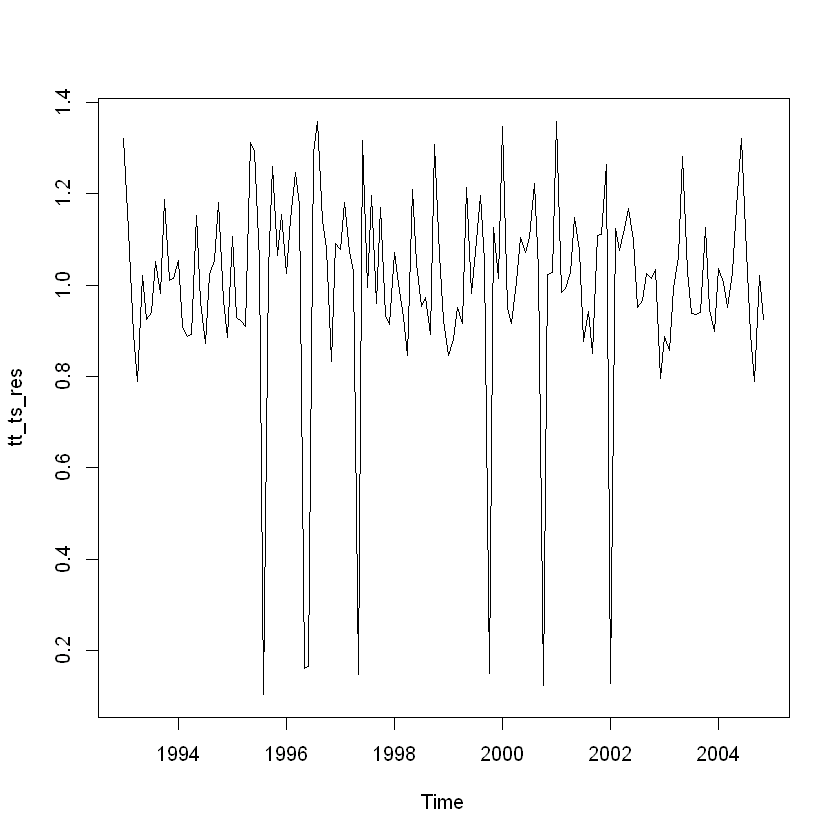

In [70]:
library(forecast)
library(car)
options(scipen=999)

t_t_data <- read.csv2("tu_foreign_visitors_93-04.csv")
tt_ts <- ts(t_t_data$Quantity, start=c(1993, 01), end=c(2004, 11), frequency=12)

#THE EASY WAY!!!
#x <- decompose(tt_ts, type = "multiplicative")
#plot(x)
#x$seasonal

#Calculate moving average
t_t_data$Seasonal <- ma(t_t_data$Quantity, 12)
t_t_data$Seasonal <- ma(t_t_data$Seasonal, 4, centre = TRUE)


#Calculate rough seasonal component
t_t_data$Seasonal <- t_t_data$Quantity / t_t_data$Seasonal
t_t_m_s <- aggregate(t_t_data$Seasonal ~ t_t_data$Month, FUN = mean)


colnames(t_t_m_s) <- c("Month", "Seasonal")

#Plot seasonal components
#plot(ts(rep(t_t_m_s$Seasonal, 11), start=c(1993, 01), end=c(2004, 11), frequency=12))

#Calculate how much bigger or smaller the rough component is
fix_ratio <- 12 / sum(t_t_m_s$Seasonal)

#Fix the rough seasonal component
t_t_m_s$Seasonal <- t_t_m_s$Seasonal * fix_ratio
t_t_data$Seasonal <- c(rep(t_t_m_s$Seasonal, 11), t_t_m_s$Seasonal[1:11])

t_t_data$Deseasonalized <- t_t_data$Quantity / t_t_data$Seasonal

tt_ts_dec <- ts(t_t_data$Deseasonalized, start=c(1993, 01), end=c(2004, 11), frequency=12)

ts.plot(tt_ts, tt_ts_dec, gpars= list(col = c("blue", "red")))

legend( x="topleft", 
        legend=c("Org data","Deseasonalized", "Trend"),
        col=c("blue","red","green"), lwd=1, 
        pch=c(NA,NA))

#Trend
trend <- lm(t_t_data$Deseasonalized ~ index(tt_ts_dec))
t_t_data$Trend <- trend$fit

abline(trend ,col="green")




t_t_data$fit <- t_t_data$Trend * t_t_data$Seasonal
tt_ts_fit <- ts(t_t_data$fit, start=c(1993, 01), end=c(2004, 11), frequency=12)
ts.plot(tt_ts_fit)

residuals <- t_t_data$Quantity / t_t_data$fit
tt_ts_res <- ts(residuals, start=c(1993, 01), end=c(2004, 11), frequency=12)

ts.plot(tt_ts_res)
durbinWatsonTest(residuals)


t_t_data$Clir <- t_t_data$Quantity / t_t_data$fit
t_t_data$Cl <- ma(t_t_data$Clir, 7)
t_t_data <- na.omit(t_t_data)
t_t_data$Clir <- t_t_data$Clir / t_t_data$Cl


t_t_data$fit <- t_t_data$Trend * t_t_data$Seasonal * t_t_data$Cl
tt_ts_fit <- ts(t_t_data$fit, start=c(1993, 01), end=c(2004, 11), frequency=12)
ts.plot(tt_ts_fit)

residuals <- t_t_data$Quantity / t_t_data$fit
tt_ts_res <- ts(residuals, start=c(1993, 01), end=c(2004, 11), frequency=12)

ts.plot(tt_ts_res)
durbinWatsonTest(residuals)






#Predict
#tt_ts_pred <- tslm(tt_ts_dec ~ trend)
#summary(tt_ts_pred)
#plot(forecast(tt_ts_pred, h=36), xaxt="n")
#axis(1, at = c(1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008), las=2)

